#Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [4]:
sample=pd.read_csv('SampleSuperstore.csv')
sample.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
col=['Postal Code']
sample1=sample.drop(columns=col,axis=1)

In [9]:
sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


#Exploratory Analysis

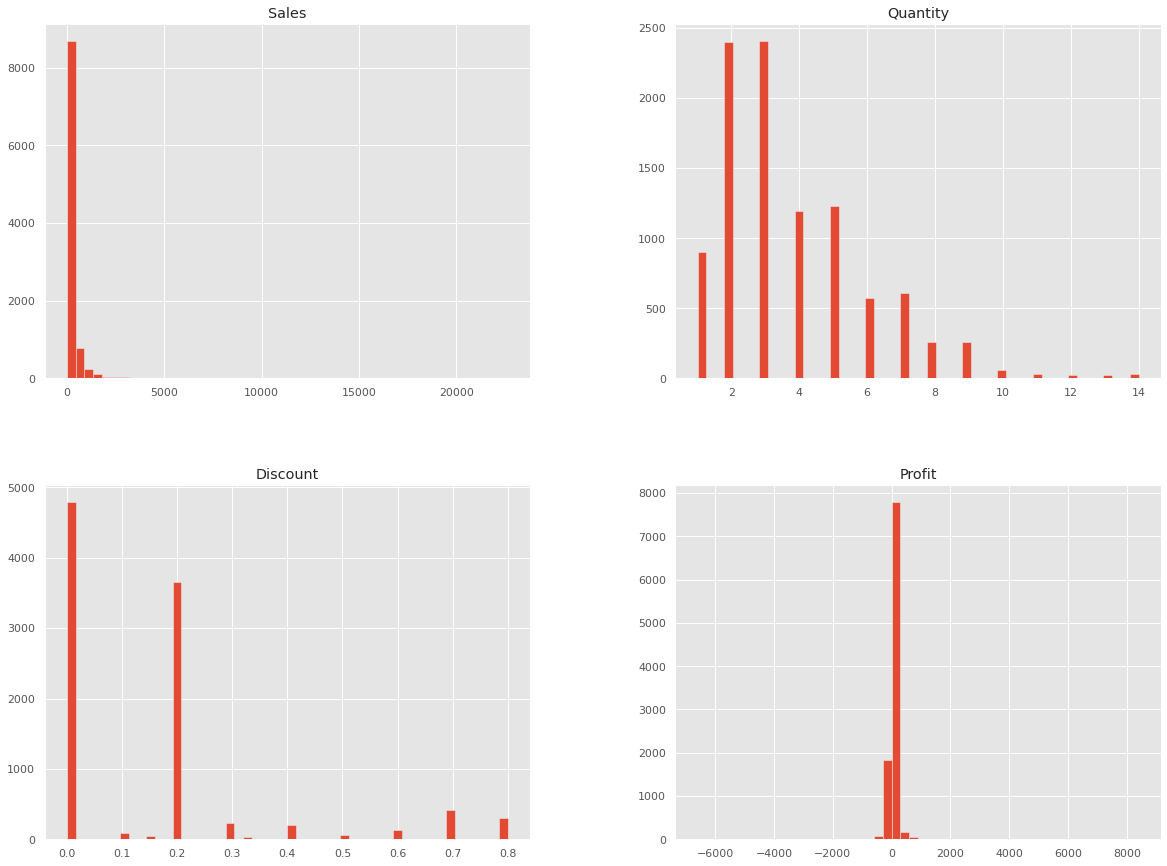

In [42]:
style.use('ggplot')
sample1.hist(bins=50 ,figsize=(20,15))

plt.show();

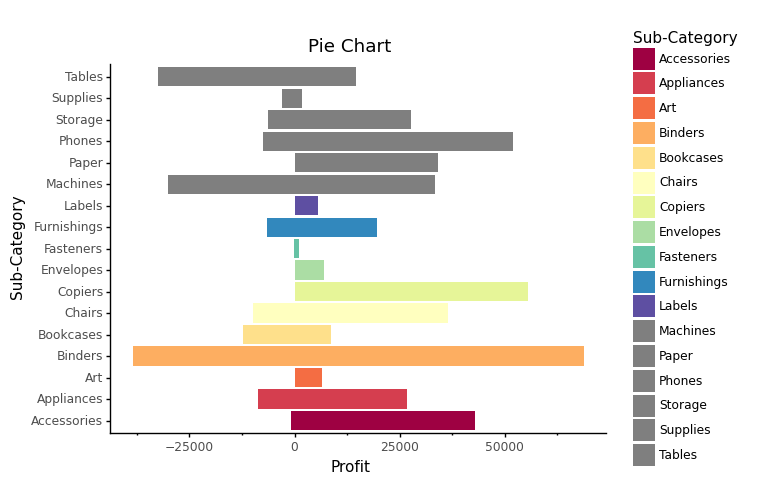

<ggplot: (8739051769920)>

In [12]:
Profit_plot = (ggplot(sample, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

Text(0.5, 0.98, 'Pie Consumption Patterns in the United States')

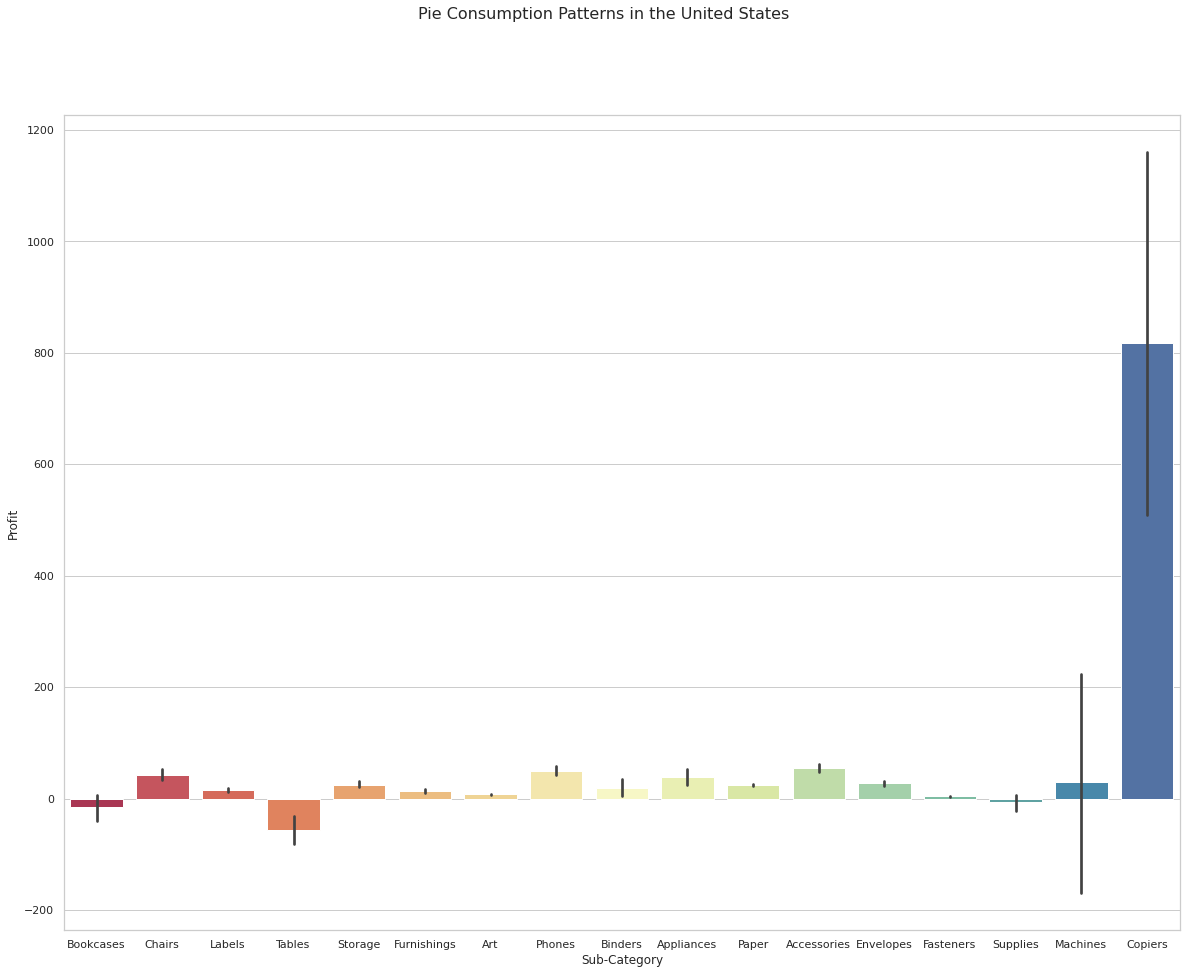

In [13]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))

sns.barplot(x='Sub-Category',y='Profit', data=sample, palette='Spectral')

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)

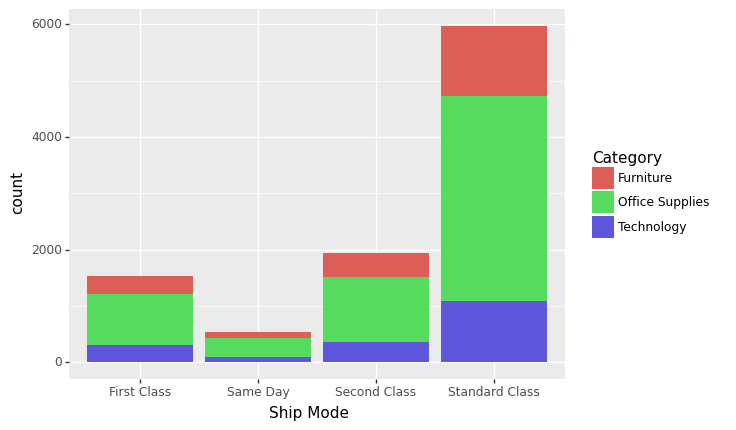

<ggplot: (-9223363297803586567)>

In [14]:
ggplot(sample, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

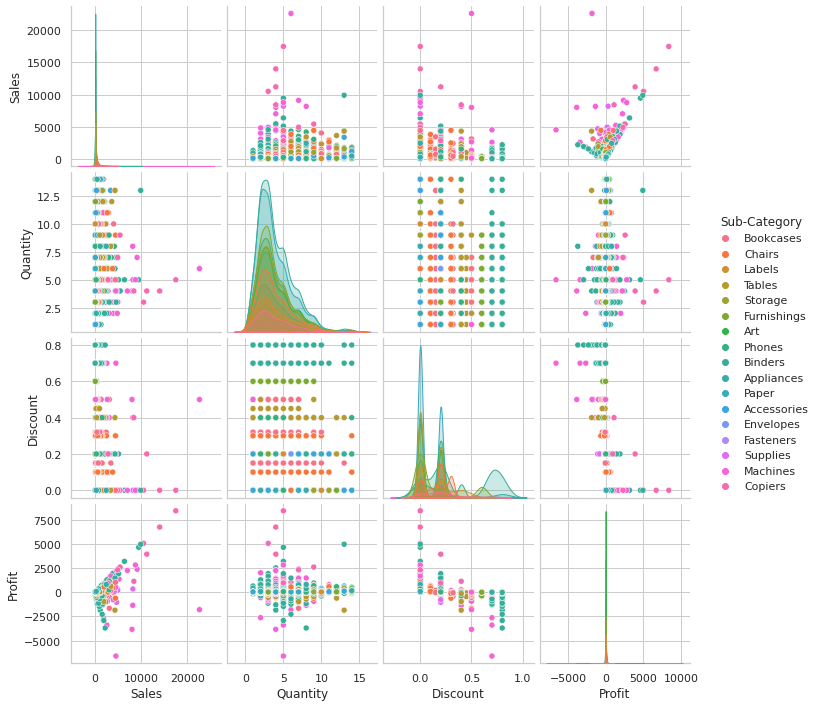

In [15]:
figsize=(15,10)
sns.pairplot(sample1,hue='Sub-Category')

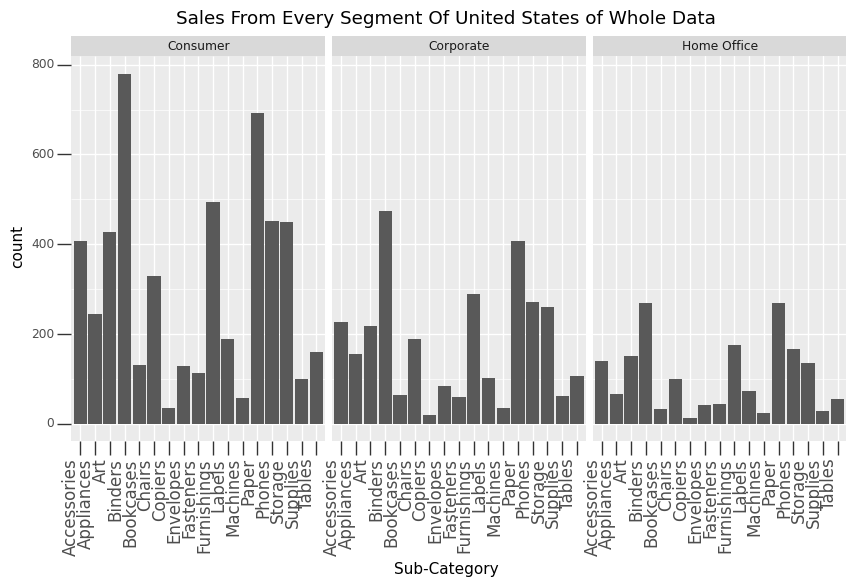

<ggplot: (-9223363297807911918)>

In [16]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

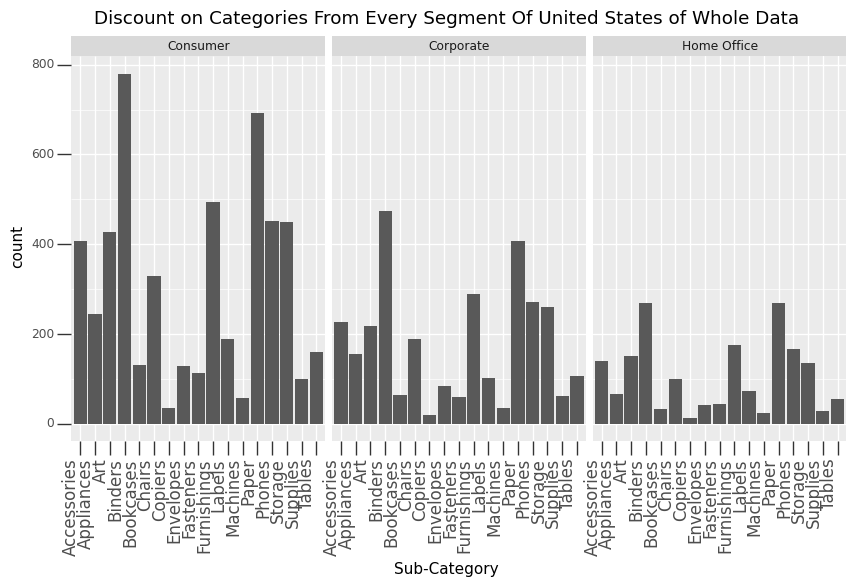

<ggplot: (8739051261192)>

In [17]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))

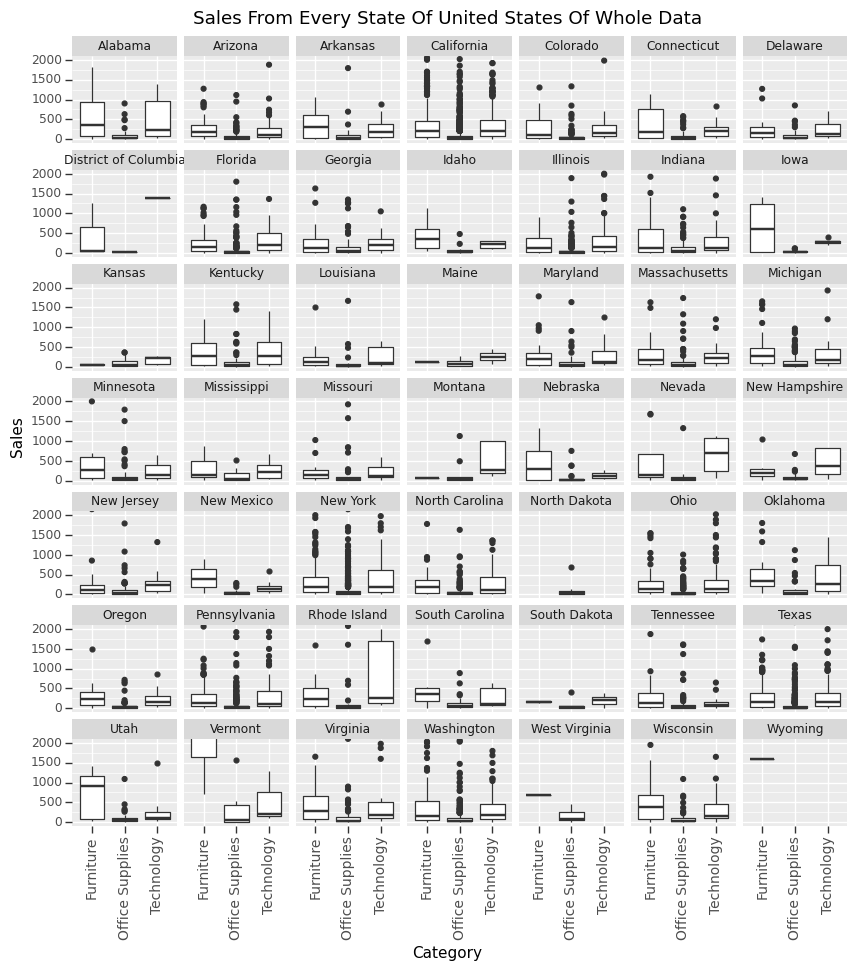

<ggplot: (-9223363297804481592)>

In [18]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,
                     axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels + coord_cartesian(ylim = (0, 2000))+ggtitle("Sales From Every State Of United States Of Whole Data"))

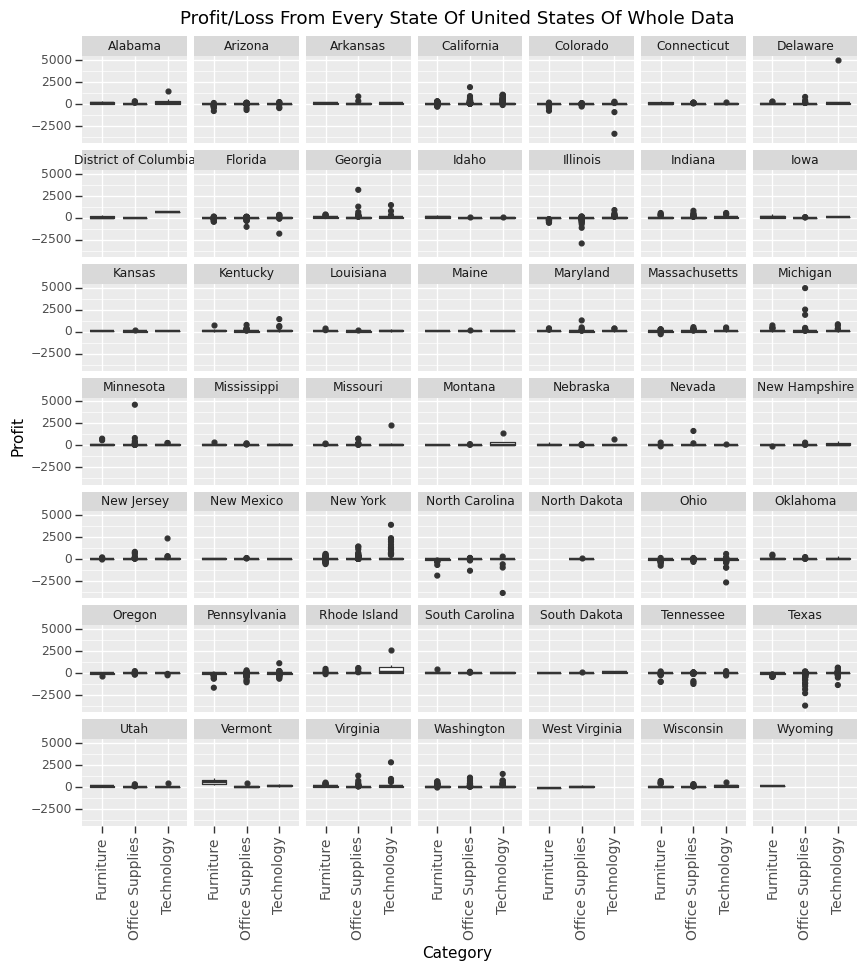

<ggplot: (-9223363297810287437)>

In [19]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+coord_cartesian(ylim = (-4000,5000))+ggtitle("Profit/Loss From Every State Of United States Of Whole Data"))

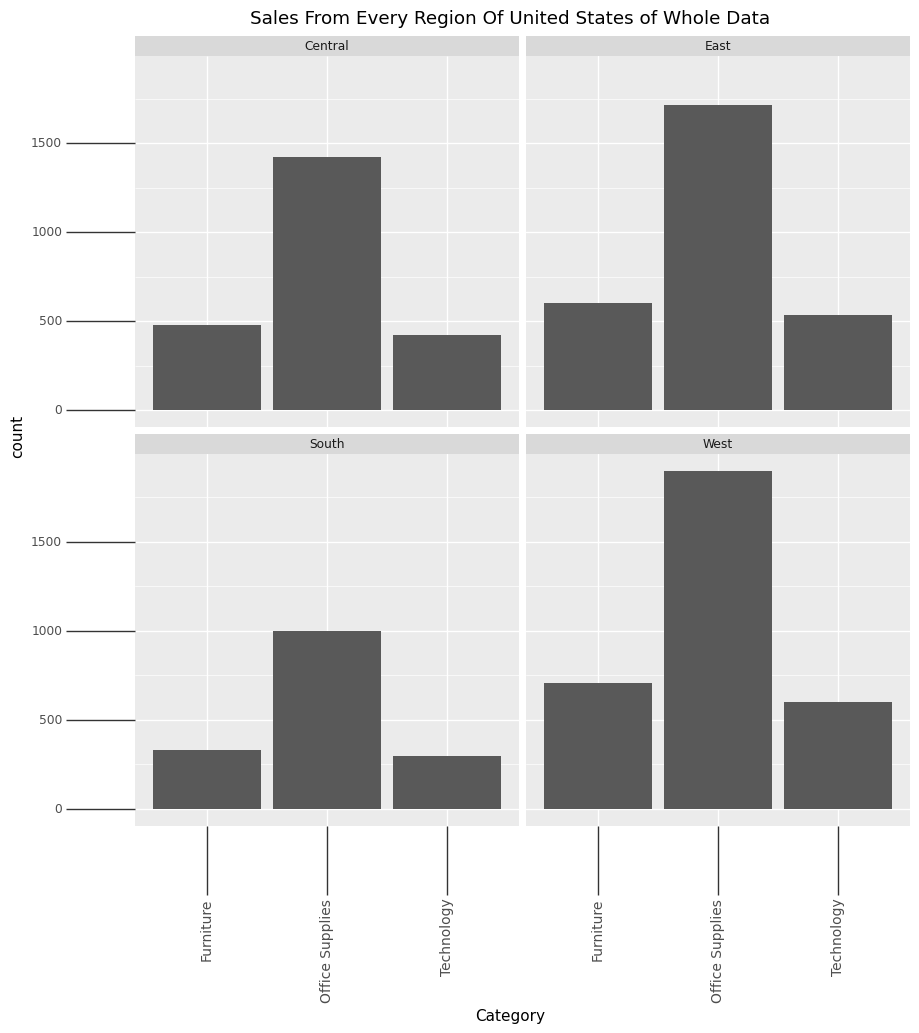

<ggplot: (8739043871068)>

In [20]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sample, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

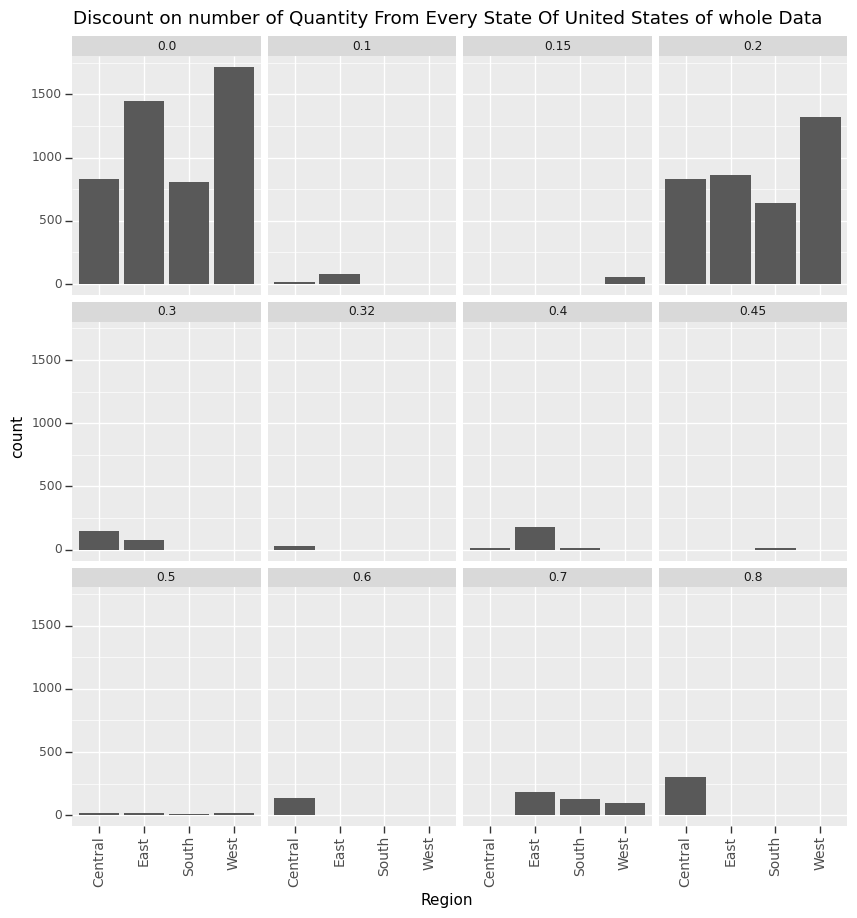

<ggplot: (8739051226404)>

In [21]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Region', fill='Quantity')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Discount']) + flip_xlabels+ggtitle("Discount on number of Quantity From Every State Of United States of whole Data"))


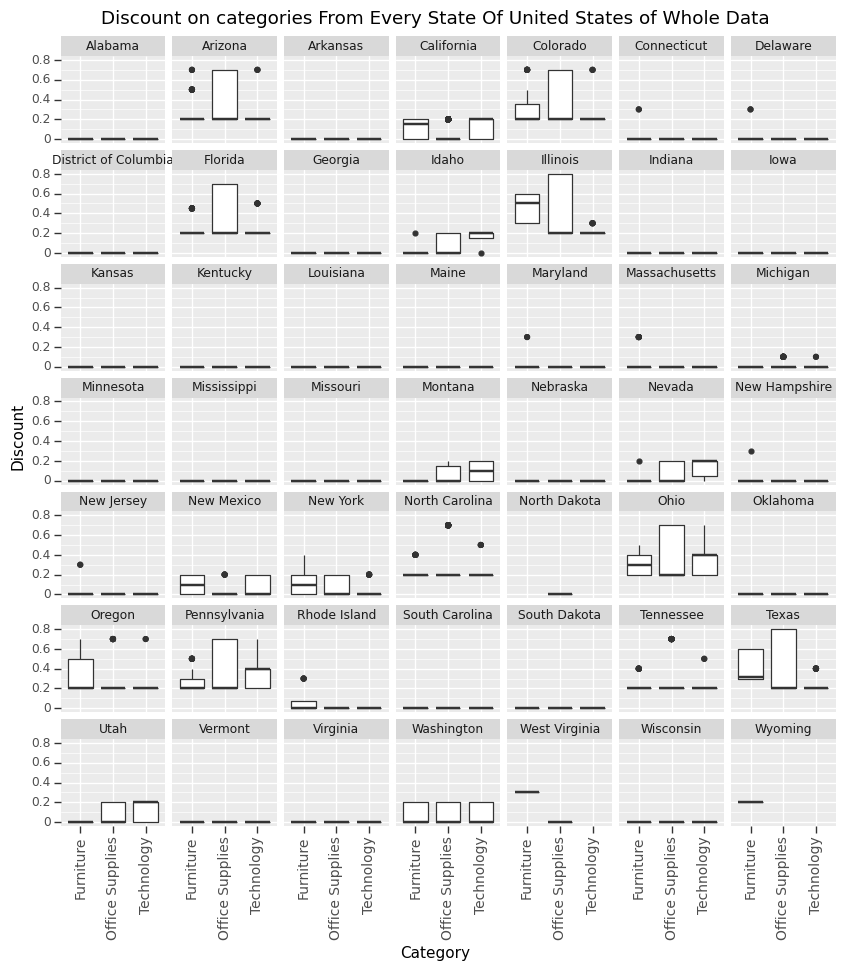

<ggplot: (8739046929265)>

In [22]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Category', y='Discount')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Discount on categories From Every State Of United States of Whole Data"))

In [23]:
grouped=pd.DataFrame(sample.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


In [24]:
sample.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


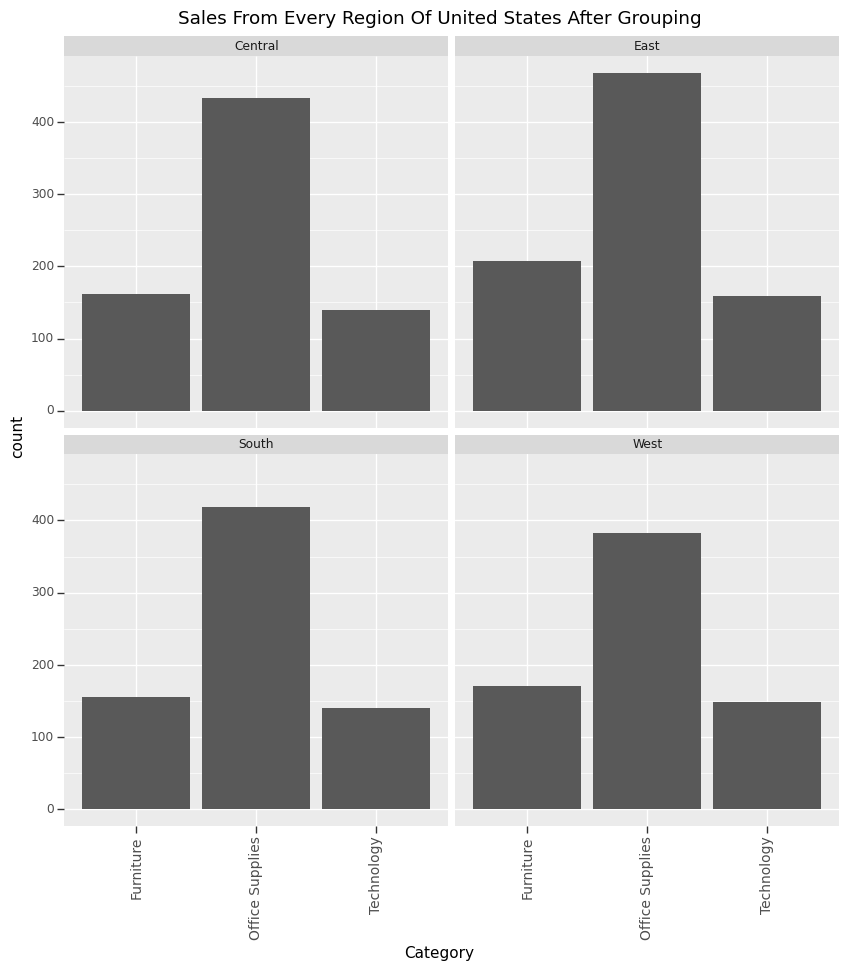

<ggplot: (8739043928640)>

In [40]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
 + facet_wrap(['Region']) + flip_xlabels+ggtitle("Sales From Every Region Of United States After Grouping"))

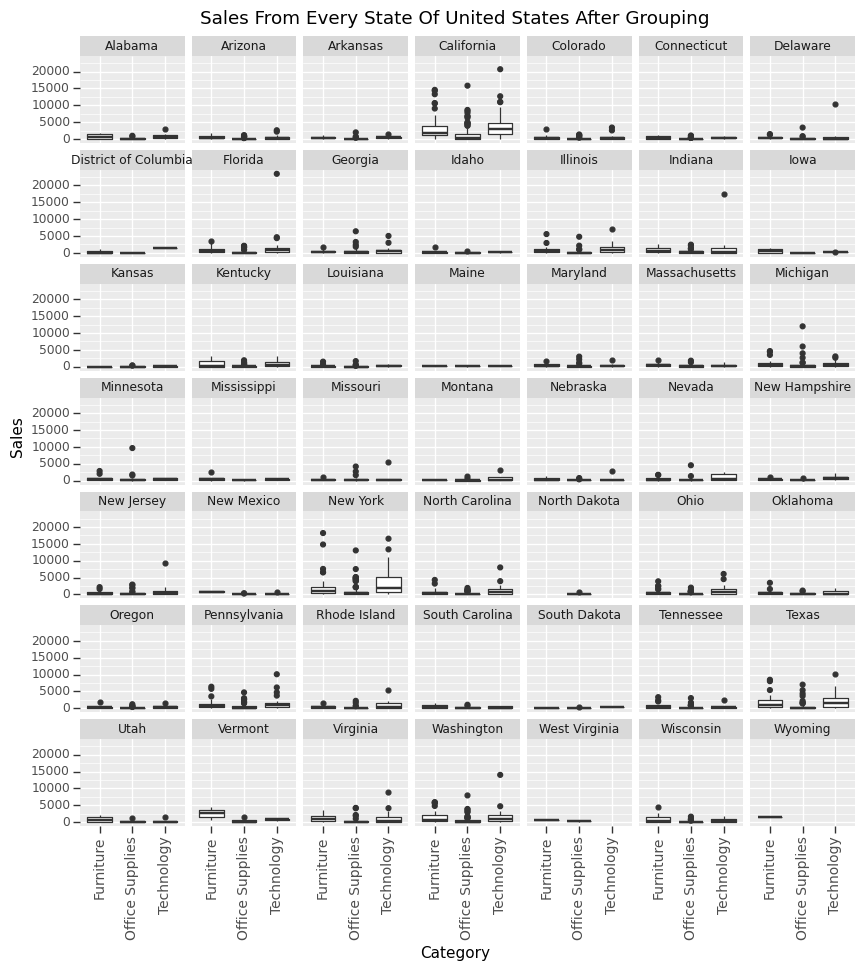

<ggplot: (8739044562913)>

In [26]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Sales From Every State Of United States After Grouping"))

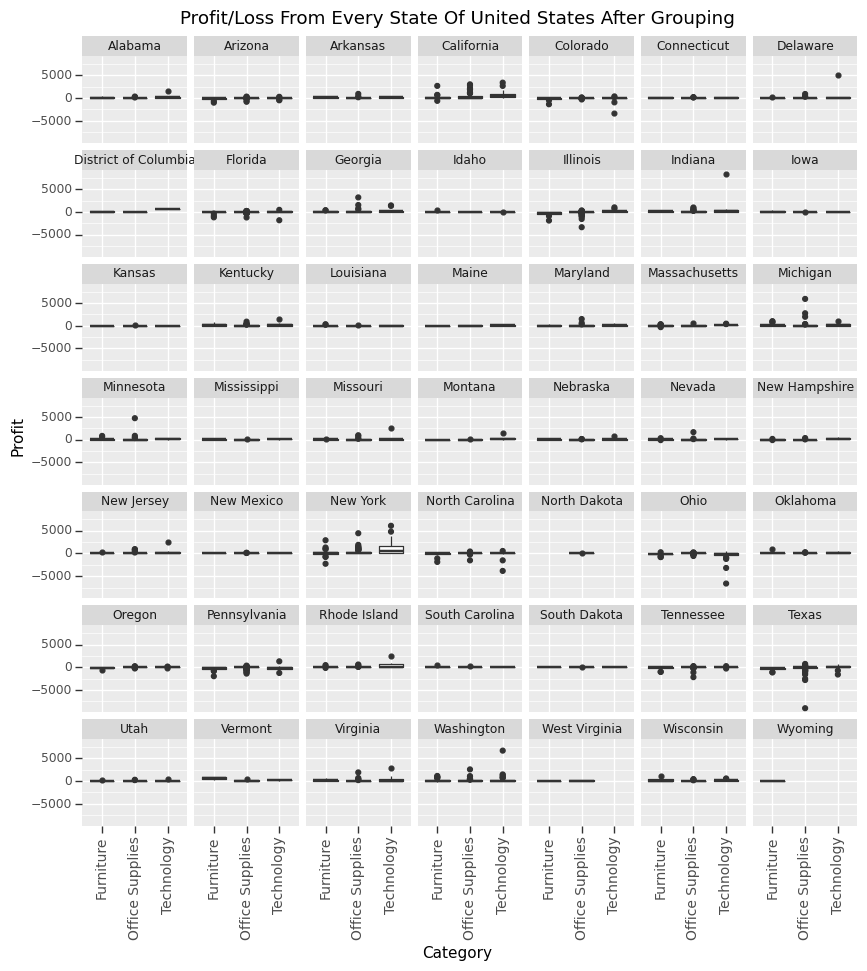

<ggplot: (8739050228449)>

In [27]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Profit/Loss From Every State Of United States After Grouping"))

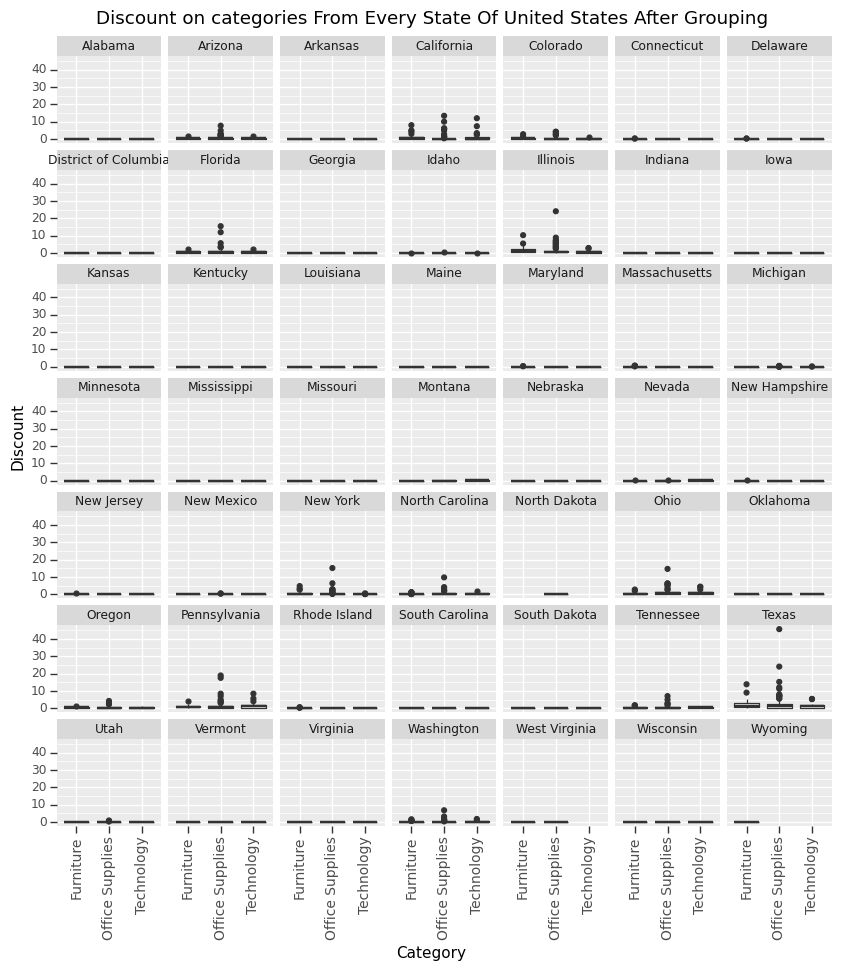

<ggplot: (8739043806598)>

In [28]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Discount')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Discount on categories From Every State Of United States After Grouping"))

In [29]:
x = sample.iloc[:, [9, 10, 11, 12]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

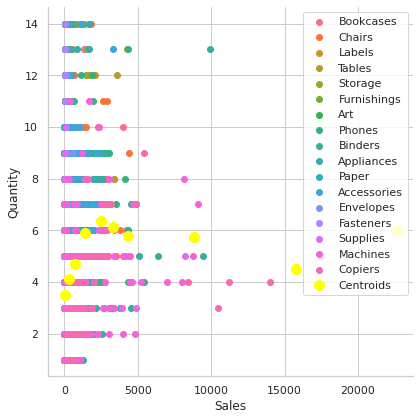

In [30]:
sns.set_style("whitegrid") 
sns.FacetGrid(sample, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


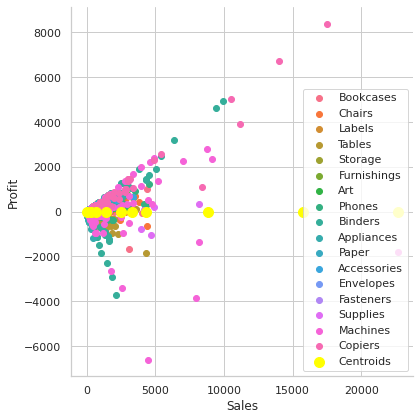

In [31]:
sns.set_style("whitegrid") 
sns.FacetGrid(sample, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()